In [2]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# more efficient parameters tuning using GridSearchCV


here , parameters for KNN is n_neighbors , weights

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [10]:
#define parameters value that should be searched
k_range = range(1, 31)
print(k_range)

range(1, 31)


In [19]:
#create a parameter grid; map the parameters to the value that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': range(1, 31)}


In [20]:
#instaniate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring = 'accuracy') 

In [21]:
print(grid)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')


In [24]:
#fit the model
grid.fit(X , y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

In [42]:
#view the complete results
grid.cv_results_

{'mean_fit_time': array([0.00240018, 0.00236228, 0.00156283, 0.00156262, 0.00156271,
        0.00156257, 0.00156252, 0.        , 0.00120134, 0.00156264,
        0.00468805, 0.0027627 , 0.        , 0.        , 0.00468817,
        0.0015625 , 0.0012001 , 0.00156291, 0.00312541, 0.00156267,
        0.00303051, 0.00039961, 0.0012001 , 0.        , 0.00240018,
        0.00240018, 0.00160003, 0.00160174, 0.00160043, 0.0016001 ]),
 'std_fit_time': array([0.00195974, 0.00469382, 0.0046885 , 0.00468786, 0.00468814,
        0.00468771, 0.00468757, 0.        , 0.00183508, 0.00468793,
        0.00716111, 0.00464678, 0.        , 0.        , 0.00716129,
        0.0046875 , 0.00183319, 0.00468872, 0.00625081, 0.004688  ,
        0.00568396, 0.00119884, 0.00183319, 0.        , 0.00195974,
        0.00195974, 0.00195963, 0.00196173, 0.00196012, 0.00195971]),
 'mean_score_time': array([0.00840282, 0.00416069, 0.00625021, 0.00312524, 0.00312521,
        0.00312574, 0.00312526, 0.00468738, 0.00399113, 0.00

In [49]:
# convert the search results into a pandas DataFrame
import pandas as pd
results = pd.DataFrame(grid.cv_results_)

# view the mean and standard deviation of the test scores for each set of parameters
results[['mean_test_score', 'std_test_score', 'params' ]]


# list all of the mean test scores
#results['mean_test_score']

,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}
6,0.966667,0.044721,{'n_neighbors': 7}
7,0.966667,0.044721,{'n_neighbors': 8}
8,0.973333,0.032660,{'n_neighbors': 9}
9,0.966667,0.044721,{'n_neighbors': 10}


In [51]:
# examine the results of the first set of parameters
results['params'][0]


{'n_neighbors': 1}

In [52]:
results['mean_test_score'][0]

0.96

In [53]:

results['std_test_score'][0]

0.05333333333333332

In [55]:
mean_score = results['mean_test_score']

In [56]:
print(mean_score)

0     0.960000
1     0.953333
2     0.966667
3     0.966667
4     0.966667
5     0.966667
6     0.966667
7     0.966667
8     0.973333
9     0.966667
10    0.966667
11    0.973333
12    0.980000
13    0.973333
14    0.973333
15    0.973333
16    0.973333
17    0.980000
18    0.973333
19    0.980000
20    0.966667
21    0.966667
22    0.973333
23    0.960000
24    0.966667
25    0.960000
26    0.966667
27    0.953333
28    0.953333
29    0.953333
Name: mean_test_score, dtype: float64


Text(0, 0.5, 'accuracy on cross validation test')

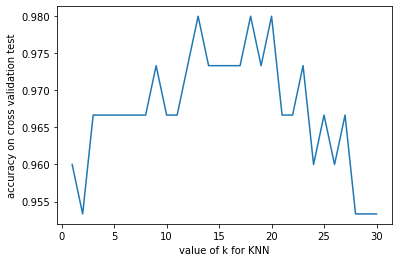

In [57]:
#plot the result
import matplotlib.pyplot as plt
#%matplotlib inline

plt.plot(k_range,mean_score)
plt.xlabel('value of k for KNN')
plt.ylabel('accuracy on cross validation test')

In [ ]:
#examine best model
#grid.best_score_.... are attributes
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

# searching multiple parameters simultaneously

In [61]:
#define the parameters value that should be searched
k_range = range(1,31)
weight_options = ['uniform' , 'distance']

In [62]:
param_grid = dict(n_neighbors = k_range, weights = weight_options)
print(param_grid)

{'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}


In [63]:
#instaniate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring = 'accuracy') 
#fit
grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [64]:
grid.cv_results_

{'mean_fit_time': array([0.00240057, 0.00200052, 0.00200069, 0.        , 0.00156245,
        0.00080009, 0.00130987, 0.00196309, 0.00156224, 0.00156322,
        0.00286107, 0.00312574, 0.        , 0.        , 0.00479629,
        0.00200002, 0.0040025 , 0.00160036, 0.00277662, 0.0008002 ,
        0.00039983, 0.00156279, 0.00156271, 0.00156276, 0.00160048,
        0.00120075, 0.00120013, 0.00120111, 0.00080097, 0.00160091,
        0.00080049, 0.00120037, 0.00043626, 0.00122499, 0.        ,
        0.        , 0.00080898, 0.00156281, 0.        , 0.00156274,
        0.00156269, 0.00156226, 0.00156295, 0.00123253, 0.        ,
        0.0012002 , 0.00156274, 0.00120063, 0.00199981, 0.00165954,
        0.00156305, 0.00156307, 0.00240028, 0.00280037, 0.00119989,
        0.00159986, 0.00279989, 0.00280051, 0.00080037, 0.00200167]),
 'std_fit_time': array([0.00196005, 0.00200052, 0.00200069, 0.        , 0.00468736,
        0.00160017, 0.00392962, 0.00470933, 0.00468671, 0.00468965,
        0.004

In [65]:
#examine best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=13)


# Using the best parameters  to make prediction

In [71]:
knn = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform')
knn.fit(X,y)
knn.predict([[5,5,5,5]])

[2]


In [72]:
#shortcut: GridSearchCV automatically refits the best model using all of the data
grid.fit(X,y)
grid.predict([[5,5,5,5]])

array([2])

# Reducing computational expense using RandomizedSearchCV
searching many diff params computationally infeasible
RandomizedSearchCV searches a subset of the parameters & you control computational budget

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
#specify parameter distributions rather than a parameter grid
param_dist = dict(n_neighbors=k_range , weights = weight_options)

In [75]:
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=20, random_state = 5)
rand.fit(X,y)
rand.cv_results_

{'mean_fit_time': array([0.00200098, 0.00081277, 0.00281184, 0.00156293, 0.        ,
        0.00196242, 0.00156257, 0.        , 0.        , 0.00079999,
        0.0015625 , 0.00080869, 0.00156252, 0.        , 0.        ,
        0.        , 0.00156341, 0.00156267, 0.002529  , 0.0008003 ]),
 'std_fit_time': array([0.00200098, 0.00162579, 0.00478221, 0.00468879, 0.        ,
        0.0047061 , 0.00468771, 0.        , 0.        , 0.00159998,
        0.0046875 , 0.0016175 , 0.00468757, 0.        , 0.        ,
        0.        , 0.00469022, 0.004688  , 0.00516722, 0.0016006 ]),
 'mean_score_time': array([0.00520051, 0.0043643 , 0.00438209, 0.00312507, 0.00312507,
        0.00179846, 0.00156255, 0.00468781, 0.00312486, 0.00436454,
        0.00165074, 0.00240114, 0.00312512, 0.00468767, 0.00312555,
        0.00312533, 0.00156243, 0.00156255, 0.00436308, 0.00476353]),
 'std_score_time': array([0.00507794, 0.00444967, 0.00514624, 0.00625014, 0.00625014,
        0.00225551, 0.00468764, 0.007160

In [76]:
#examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.9800000000000001
{'weights': 'uniform', 'n_neighbors': 18}


In [82]:
#run randomized CV for 20 times(with n_iter=10) & store best score
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn , param_dist, cv=10, scoring='accuracy' , n_iter = 10)
    rand.fit(X,y)
    best_scores.append(round(rand.best_score_,3))
print(best_scores)    

[0.98, 0.973, 0.98, 0.98, 0.973, 0.98, 0.98, 0.98, 0.973, 0.973, 0.98, 0.98, 0.98, 0.973, 0.973, 0.98, 0.973, 0.98, 0.973, 0.98]
